<a href="https://colab.research.google.com/github/isabelamchaves/DS_Projeto/blob/main/Projeto_Data_Science_Manutencao_Preditiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Data Science: Predição da Manutenção Preditiva de Máquinas Industriais.

## 1. Definição do problema

O problema envolve prever o tipo de falha que uma máquina pode sofrer durante sua operação com base em dados de sensores, sendo um problema de classificação. As variáveis de entrada incluem temperatura, torque, velocidade de rotação e desgaste da ferramenta. Premissas incluem que as condições de operação podem ser monitoradas e que variáveis como o tempo de uso influenciam o risco de falhas. Restrições envolvem a limitação dos dados a máquinas específicas e condições operacionais. O objetivo é treinar um modelo capaz de antecipar falhas e melhorar a manutenção preditiva, identificando padrões nos dados.

Atributos do dataset:
* ID único: Identificação única de cada observação;
* ID do Produto: Identificação do produto monitorado;
* Temperatura do Ar [C]: Temperatura do ar ambiente;
* Temperatura do Processo [C]: Temperatura do processo operacional;
* Velocidade de Rotação [rpm]: Velocidade de rotação da máquina;
* Torque [Nm]: Torque aplicado à máquina;
* Desgaste da Ferramenta [min]: Tempo de desgaste da ferramenta;
* Falha da Máquina: Variável alvo que indica se houve falha (1) ou não (0).

In [ ]:
# Importação das bibliotecas necessárias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib

## 2. Análise exploratória dos dados

O principal objetivo desse capítulo é observar os dados do dataset, como: o cabeçalho do dataset, a quantidade de dados e os tipos das variáveis. Além disso, é preciso entender como os dados estão distribuídos, fazer a verificação de valores nulos e entender quais variáveis mais afetam a classificação de falha ou não da máquina.

### 2.1. Carregamento do dataset e renomeação das colunas

In [ ]:
# Carregar dataset enviado
data = pd.read_csv('https://raw.githubusercontent.com/isabelamchaves/DS_Projeto/refs/heads/main/machine_predictive_maintenance.csv')

# Renomear as colunas para o português
data.rename(columns={
    'UID': 'ID único',
    'product_ID': 'ID do Produto',
    'air_temperature [C]': 'Temperatura do Ar [C]',
    'process_temperature [C]': 'Temperatura do Processo [C]',
    'rotational_speed [rpm]': 'Velocidade de Rotação [rpm]',
    'torque [Nm]': 'Torque [Nm]',
    'tool_wear [min]': 'Desgaste da Ferramenta [min]',
    'machine_failure': 'Falha da Máquina'
}, inplace=True)

# Ver as primeiras linhas do dataset
data.head()

,ID único,ID do Produto,Temperatura do Ar [C],Temperatura do Processo [C],Velocidade de Rotação [rpm],Torque [Nm],Desgaste da Ferramenta [min],Falha da Máquina
0,1,M311,23.218230,34.078841,338.322430,26.459252,168.227851,1
1,2,L985,30.288966,38.721727,1764.197754,52.094885,253.759629,1
2,3,L559,23.393315,32.656344,1510.895924,46.450104,361.086240,1
3,4,M306,26.460979,36.091775,991.614944,36.377129,70.571672,0
4,5,M590,24.545991,33.771326,2750.935159,25.853629,156.828498,0


### 2.2. Análise dos dados do dataset

In [ ]:
# Verificando o número de instâncias e atributos
print(f"Instâncias: {data.shape[0]}, Atributos: {data.shape[1]}")

Instâncias: 50000, Atributos: 8


In [ ]:
# Tipos de dados dos atributos
print(data.dtypes)

ID único                          int64
ID do Produto                    object
Temperatura do Ar [C]           float64
Temperatura do Processo [C]     float64
Velocidade de Rotação [rpm]     float64
Torque [Nm]                     float64
Desgaste da Ferramenta [min]    float64
Falha da Máquina                  int64
dtype: object


In [ ]:
# Verificar valores nulos
data.isnull().sum()

,0
ID único,0
ID do Produto,0
Temperatura do Ar [C],0
Temperatura do Processo [C],0
Velocidade de Rotação [rpm],0
Torque [Nm],0
Desgaste da Ferramenta [min],0
Falha da Máquina,0


In [ ]:
# Verificar dados estatísticos
data.describe()
# Resumo dos valores numéricos: mínimo, máximo, média, desvio padrão, etc.

,ID único,Temperatura do Ar [C],Temperatura do Processo [C],Velocidade de Rotação [rpm],Torque [Nm],Desgaste da Ferramenta [min],Falha da Máquina
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,25.994893,35.993569,1501.289226,40.007946,165.304027,0.492320
std,14433.901067,1.997760,2.231805,501.305681,14.960984,74.550583,0.499946
min,1.000000,18.054976,26.074956,-948.540214,0.008103,-116.502503,0.000000
25%,12500.750000,24.651711,34.488274,1162.201843,29.828056,112.451237,0.000000
50%,25000.500000,25.987785,35.997117,1504.969536,39.949215,162.079077,0.000000
75%,37500.250000,27.350869,37.490558,1839.560659,50.126674,215.810754,1.000000
max,50000.000000,33.674031,44.954816,3509.143484,103.225404,486.943087,1.000000


Ao analisar os valores mínimos das variáveis Velocidade de Rotação e Desgaste da Ferramenta é possível observar valores negativos, mas isso é impossível. Iremos tratar esse valores posteriormente.

### 2.3. Verificação de valores negativos

In [ ]:
# Verificar valores negativos nas colunas de desgaste da ferramenta e velocidade de rotação
valores_negativos_df = data[(data['Desgaste da Ferramenta [min]'] < 0) | (data['Torque [Nm]'] < 0)]
valores_negativos_vr = data[(data['Velocidade de Rotação [rpm]'] < 0)]
print(f"Linhas com valores negativos na variável Desgaste de Ferramenta: {valores_negativos_df.shape[0]}")
print(f"Linhas com valores negativos na variável Torque: {valores_negativos_vr.shape[0]}")

Linhas com valores negativos na variável Desgaste de Ferramenta: 383
Linhas com valores negativos na variável Torque: 56


### 2.4. Análise da distribuição dos dados

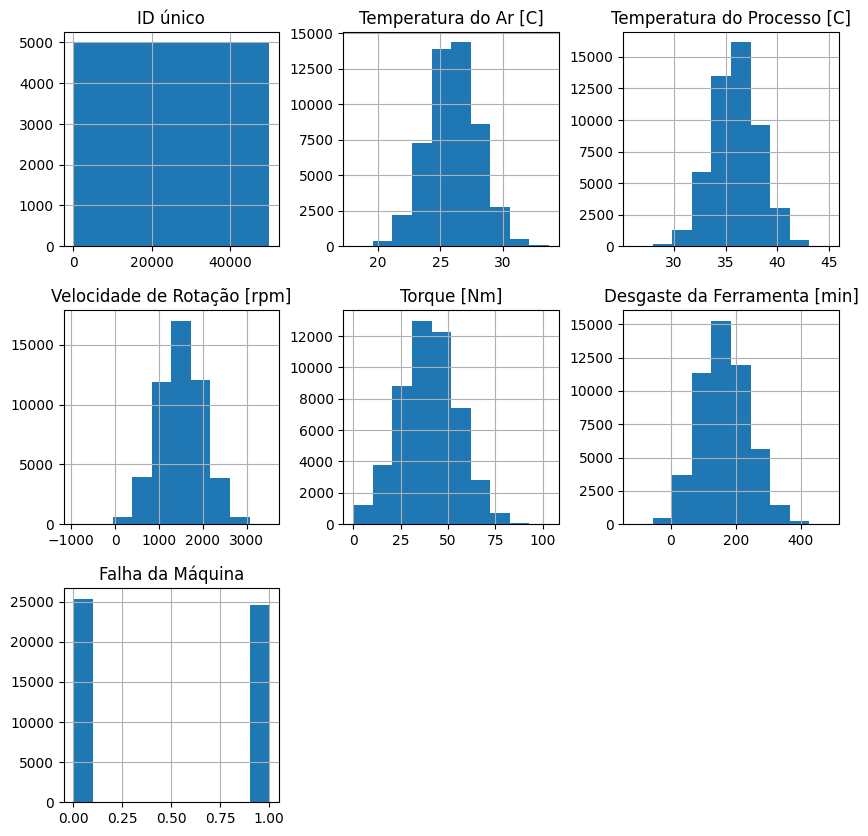

In [ ]:
# Visualizando a distribuição de cada atributo numérico
data.hist(figsize=(10, 10))
plt.show()

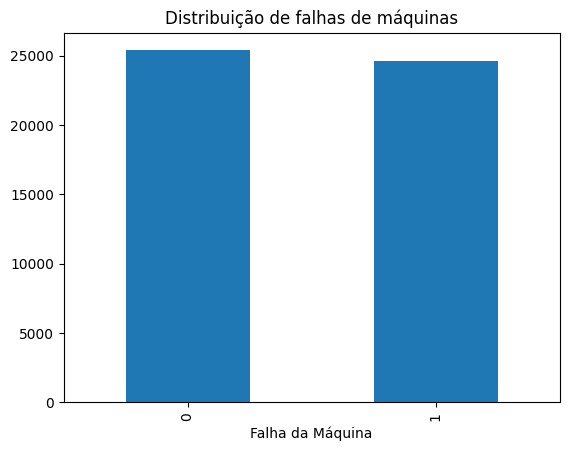

In [ ]:
# Verificar distribuição das variáveis
data['Falha da Máquina'].value_counts().plot(kind='bar')
plt.title("Distribuição de falhas de máquinas")
plt.show()

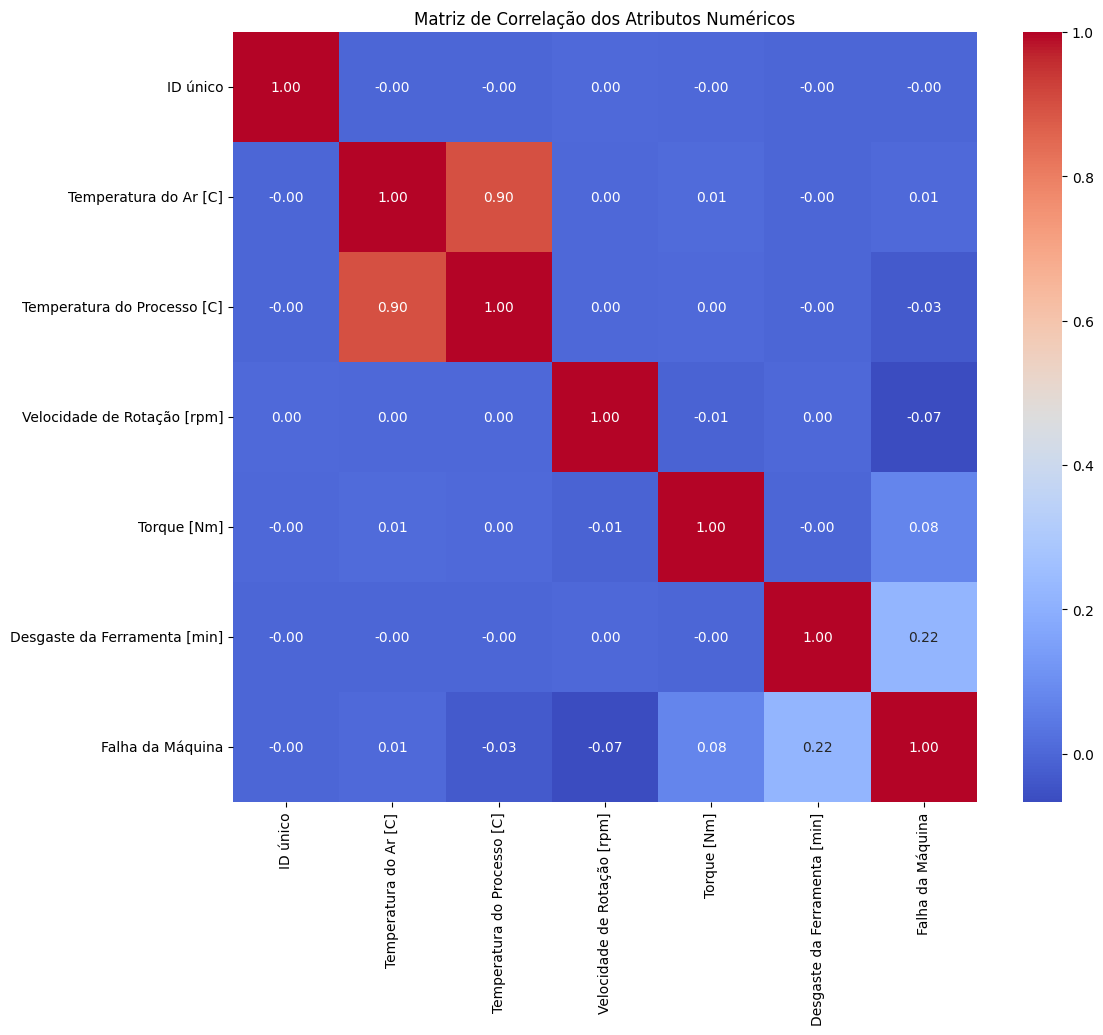

In [ ]:
# Selecionar apenas as colunas numéricas
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Calcular a matriz de correlação
corr_matrix = data[numerical_cols].corr()

# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação dos Atributos Numéricos')
plt.show()

Com essa matriz de correlação, é possível observar uma grande dependência entre as variáveis de temperatura do ar e temperatura do processo. Além disso, a única varivável que apresentou uma correlação considerável com a variável alvo, falha da máquina, foi a variável de desgaste de ferramenta.

### 2.5. Conclusão da análise exploratória dos dados

Com a análise da distribuição dos dados foi possível observar que a variável alvo, Falha da Máquina, está balanceada e que não há valores nulos neste dataset. Além disso, será preciso realizar um tratamento nos dados das variáveis de Desgaste da Ferramenta e Velocidade de Rotação, pois apresentaram valores negativos, irreais.

## 3. Preparação dos dados

Nesta etapa, realizamos operações de limpeza e preparação dos dados para o treinamento dos modelos.


### 3.1. Limpeza nos dados negativos das variáveis de Desgaste da Ferramenta e Velocidade de Rotação

In [ ]:
data_limpo = data.copy()

# Substituir valores negativos pela média das colunas
media_desgaste = data_limpo['Desgaste da Ferramenta [min]'].mean()
media_velocidade = data_limpo['Velocidade de Rotação [rpm]'].mean()

data_limpo['Desgaste da Ferramenta [min]'] = data_limpo['Desgaste da Ferramenta [min]'].apply(lambda x: media_desgaste if x < 0 else x)
data_limpo['Velocidade de Rotação [rpm]'] = data_limpo['Velocidade de Rotação [rpm]'].apply(lambda x: media_velocidade if x < 0 else x)

# Verificar da limpeza dos valores negativos nas colunas de desgaste da ferramenta e velocidade de rotação
valores_negativos_df = data_limpo[(data_limpo['Desgaste da Ferramenta [min]'] < 0)]
valores_negativos_vr = data_limpo[(data_limpo['Velocidade de Rotação [rpm]'] < 0)]
print(f"Linhas com valores negativos na variável Desgaste de Ferramenta: {valores_negativos_df.shape[0]}")
print(f"Linhas com valores negativos na variável Velocidade de Rotação: {valores_negativos_vr.shape[0]}")

Linhas com valores negativos na variável Desgaste de Ferramenta: 0
Linhas com valores negativos na variável Velocidade de Rotação: 0


### 3.2. Verificação do impacto da limpeza

In [ ]:
# Comparar o número de linhas antes e depois da limpeza
print(f"Número de linhas antes da limpeza: {data.shape[0]}")
print(f"Número de linhas depois da limpeza: {data_limpo.shape[0]}")

# Comparar o número de valores negativos antes e depois
negativos_antes = data[(data['Desgaste da Ferramenta [min]'] < 0) | (data['Velocidade de Rotação [rpm]'] < 0)].shape[0]
negativos_depois = data_limpo[(data_limpo['Desgaste da Ferramenta [min]'] < 0) | (data_limpo['Velocidade de Rotação [rpm]'] < 0)].shape[0]

print(f"Valores negativos antes da limpeza: {negativos_antes}")
print(f"Valores negativos depois da limpeza: {negativos_depois}")

Número de linhas antes da limpeza: 50000
Número de linhas depois da limpeza: 50000
Valores negativos antes da limpeza: 438
Valores negativos depois da limpeza: 0


In [ ]:
# Estatísticas descritivas antes da limpeza
print("Estatísticas antes da limpeza:")
print(data[['Desgaste da Ferramenta [min]', 'Velocidade de Rotação [rpm]']].describe())

# Estatísticas descritivas depois da limpeza
print("Estatísticas depois da limpeza:")
print(data_limpo[['Desgaste da Ferramenta [min]', 'Velocidade de Rotação [rpm]']].describe())

Estatísticas antes da limpeza:
       Desgaste da Ferramenta [min]  Velocidade de Rotação [rpm]
count                  50000.000000                 50000.000000
mean                     165.304027                  1501.289226
std                       74.550583                   501.305681
min                     -116.502503                  -948.540214
25%                      112.451237                  1162.201843
50%                      162.079077                  1504.969536
75%                      215.810754                  1839.560659
max                      486.943087                  3509.143484
Estatísticas depois da limpeza:
       Desgaste da Ferramenta [min]  Velocidade de Rotação [rpm]
count                  50000.000000                 50000.000000
mean                     166.724563                  1503.168957
std                       72.730811                   498.109373
min                        0.008521                     3.878280
25%                      11

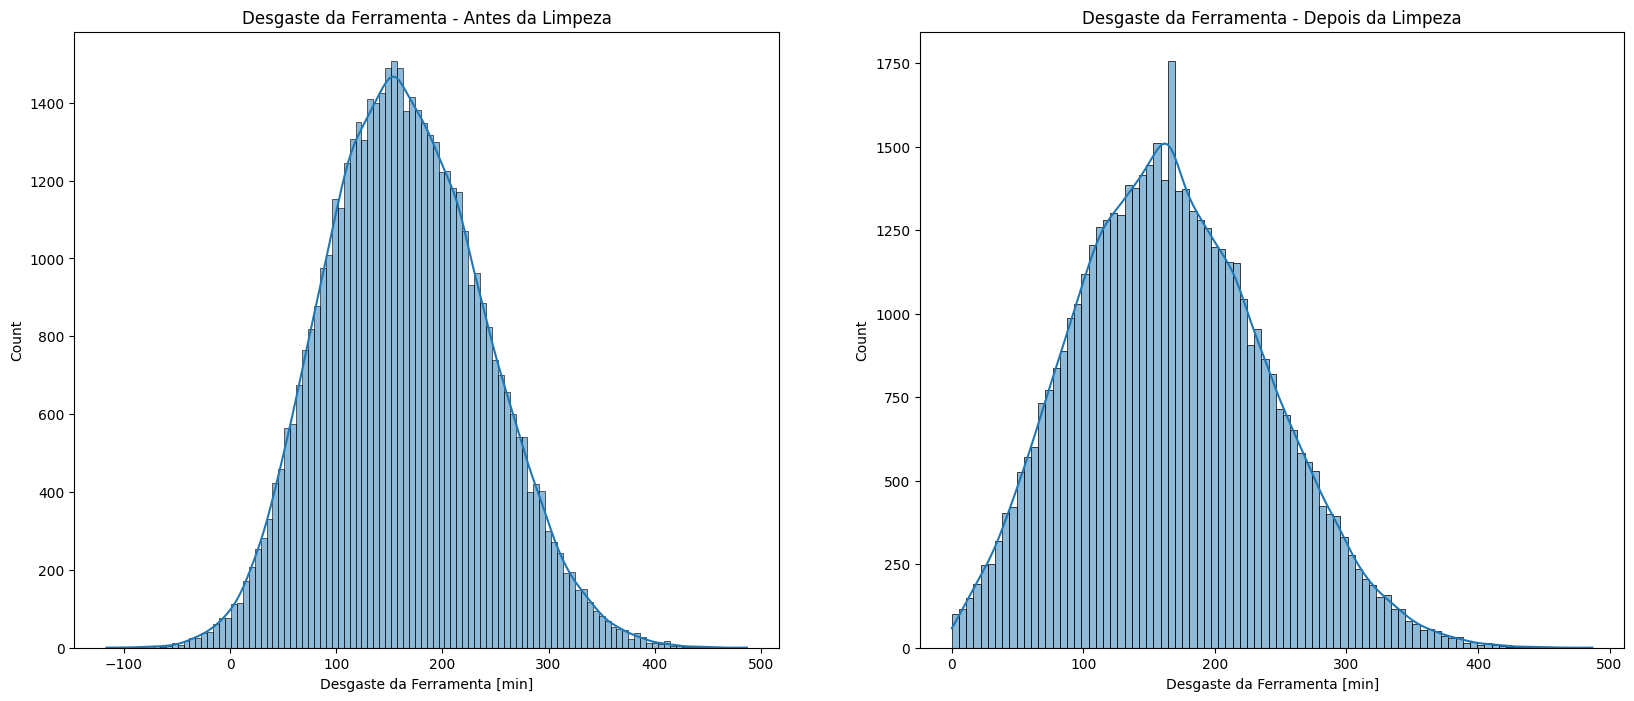

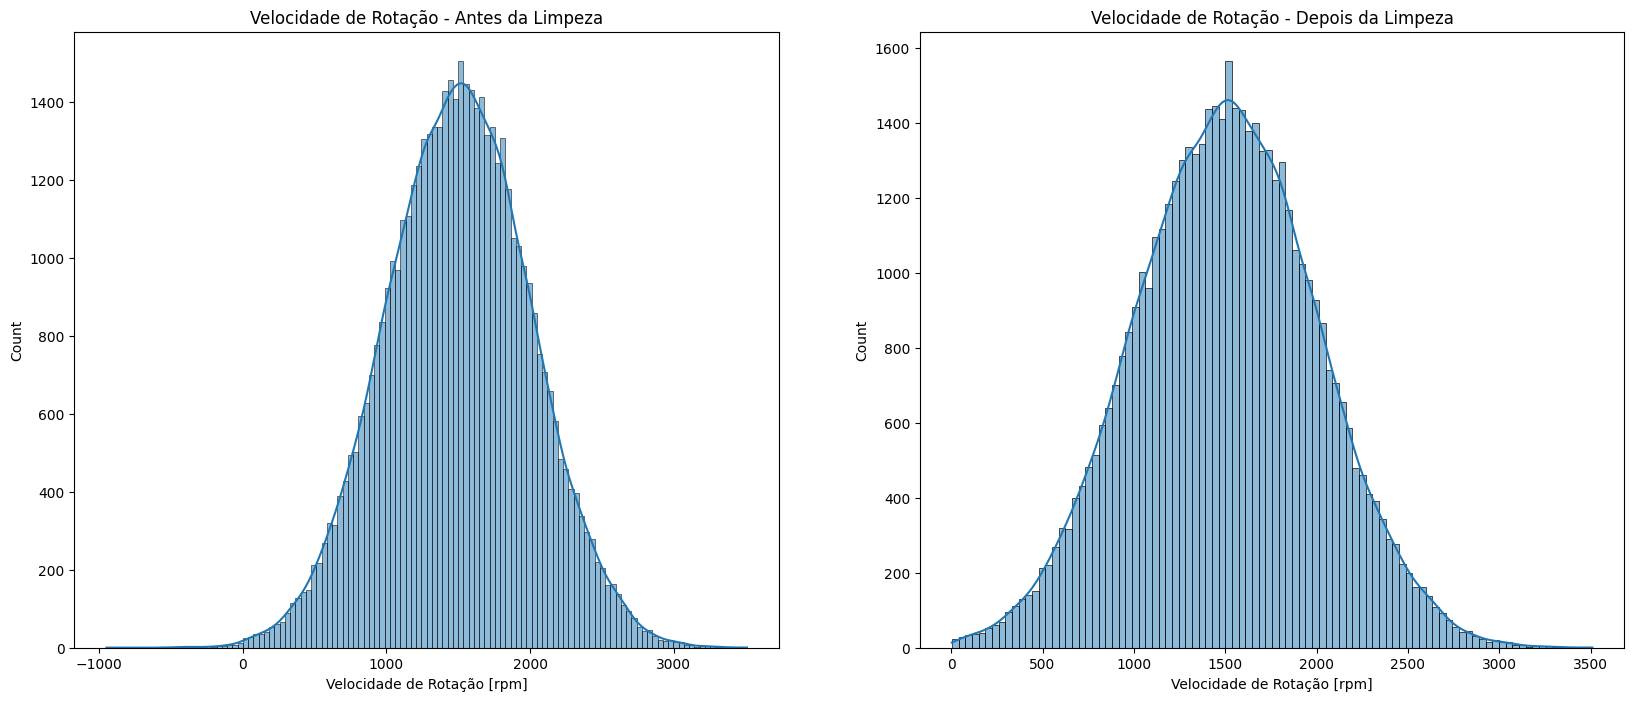

In [ ]:
# Histogramas antes da limpeza
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.histplot(data['Desgaste da Ferramenta [min]'], kde=True)
plt.title('Desgaste da Ferramenta - Antes da Limpeza')

plt.subplot(1, 2, 2)
sns.histplot(data_limpo['Desgaste da Ferramenta [min]'], kde=True)
plt.title('Desgaste da Ferramenta - Depois da Limpeza')
plt.show()

# Histogramas depois da limpeza

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.histplot(data['Velocidade de Rotação [rpm]'], kde=True)
plt.title('Velocidade de Rotação - Antes da Limpeza')

plt.subplot(1, 2, 2)
sns.histplot(data_limpo['Velocidade de Rotação [rpm]'], kde=True)
plt.title('Velocidade de Rotação - Depois da Limpeza')
plt.show()

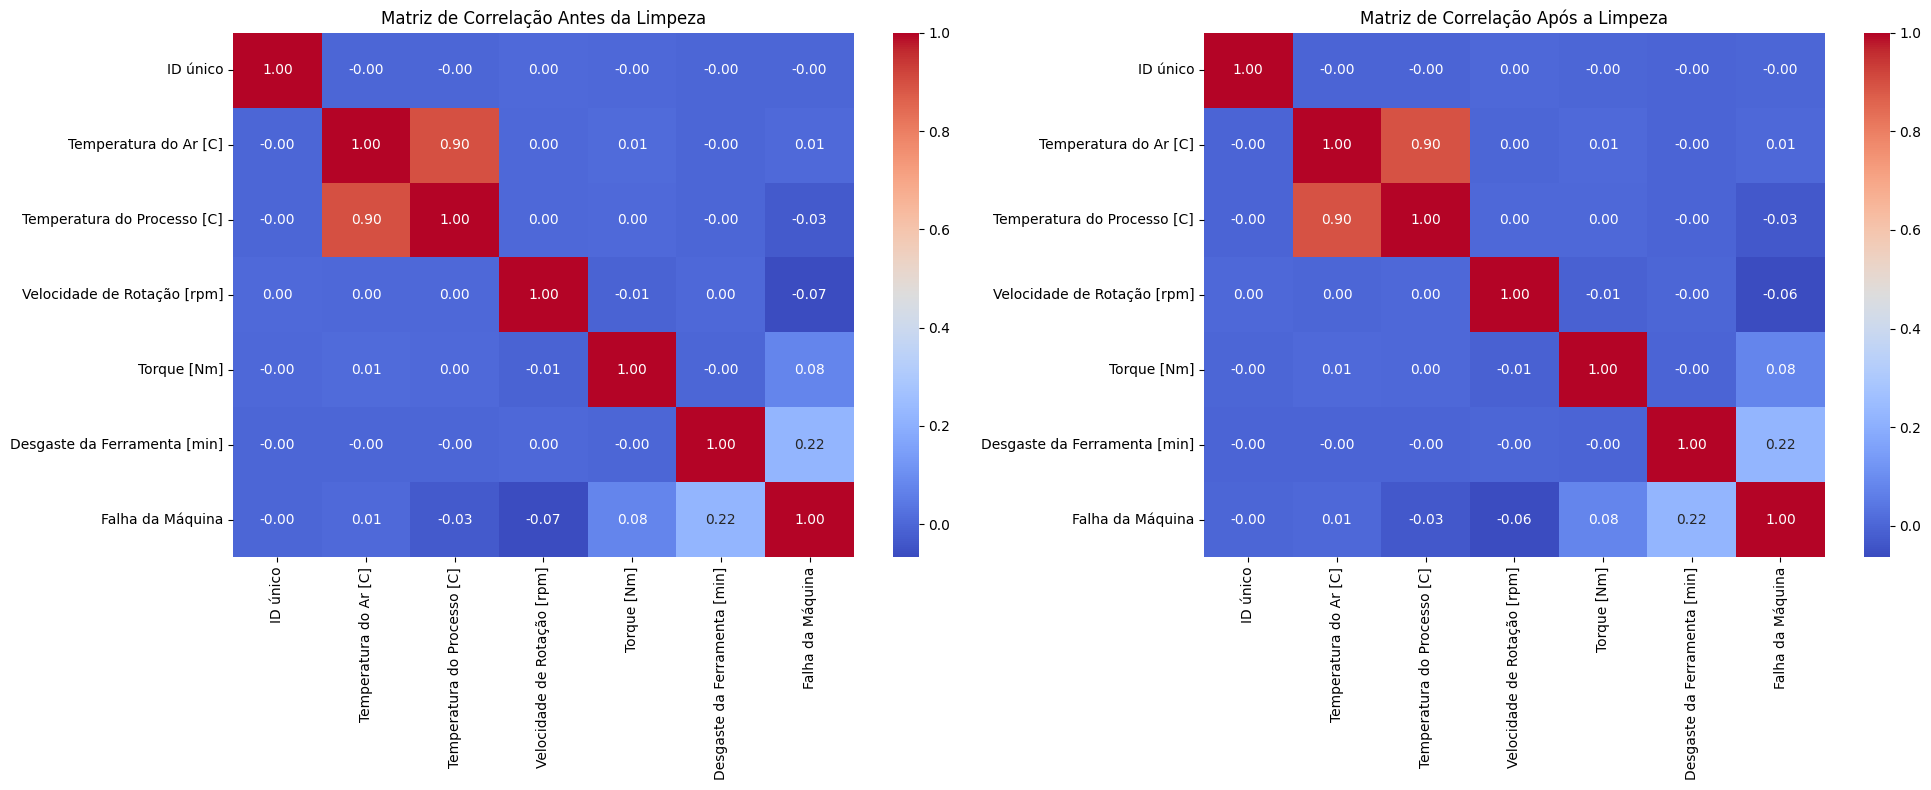

In [ ]:
# Selecionar apenas as colunas numéricas
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Calcular a matriz de correlação antes da limpeza
corr_matrix = data[numerical_cols].corr()

# Selecionar apenas as colunas numéricas após a limpeza
numerical_cols_limpo = data_limpo.select_dtypes(include=['float64', 'int64']).columns

# Calcular a matriz de correlação após a limpeza
corr_matrix_limpo = data_limpo[numerical_cols_limpo].corr()

# Criar uma figura com 2 subplots lado a lado
plt.figure(figsize=(20, 8))  # Definir o tamanho da figura

# Subplot 1: Matriz de correlação antes da limpeza
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1ª posição
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação Antes da Limpeza')

# Subplot 2: Matriz de correlação após a limpeza
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2ª posição
sns.heatmap(corr_matrix_limpo, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação Após a Limpeza')

# Exibir os gráficos
plt.tight_layout()  # Ajusta o layout para não sobrepor os elementos
plt.show()

Assim, é possível observar que a limpeza dos dados afetou muito pouco os valores das variáveis.

### 3.3. Exclusão da coluna alvo, ID Único e ID do Produto

In [ ]:
# Selecionando as features (variáveis preditoras) e a variável alvo (Falha da Máquina)
X = data_limpo.drop(columns=['Falha da Máquina','ID único','ID do Produto'])  # Excluindo a coluna alvo, ID único e ID do produto
y = data_limpo['Falha da Máquina']  # Definindo a coluna alvo

### 3.4. Preenchimento dos valores nulos

Mesmo que, pela análise exploratória dos dados, tenha sido possível observar que não há valores nulos nesse dataset, este tópico foi criado com a finalidade de ser usado em outros datasets, que podem ter valores nulos.

In [ ]:
# Identificar colunas numéricas e categóricas
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preencher valores nulos nas colunas numéricas com a média
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

# Preencher valores nulos nas colunas categóricas com a moda (valor mais frequente)
# Verificar se existem colunas categóricas e se a moda não está vazia
if len(categorical_cols) > 0 and not X[categorical_cols].mode().empty:
    X[categorical_cols] = X[categorical_cols].fillna(X[categorical_cols].mode().iloc[0])
else:
    print("No categorical columns found or mode is empty. Skipping categorical imputation.")

No categorical columns found or mode is empty. Skipping categorical imputation.


### 3.5. Divisão do dataset

In [ ]:
# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Separar colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Definir transformações para colunas numéricas e categóricas
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combinando transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## 4. Modelagem e avaliação dos resultados

Nesta etapa, exploramos diferentes arquiteturas de modelos de machine learning e avaliamos suas performances, buscando a melhor solução para o problema em análise.

### 4.1. Definição do melhor modelo de classificação e seus hiperparâmetros

Neste tópico, serão testados os modelos mais utilizados em problemas de classificação, além de definidos os seus melhores hiperparâmetros.

In [ ]:
# Definir modelos de classificação e seus hiperparâmetros para otimização

modelos_params = {
    'Regressão Logística': {
        'modelo': LogisticRegression(max_iter=1000),
        'params': {
            'classifier__C': [0.1, 1, 10]
        }
    },
    'Random Forest': {
        'modelo': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 5, 10]
        }
    },
    'SVM': {
        'modelo': SVC(probability=True),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf']
        }
    },
    'KNN': {
        'modelo': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7]
        }
    },
    'Árvore de Decisão': {
        'modelo': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [None, 5, 10]
        }
    },
    'Gradient Boosting': {
        'modelo': GradientBoostingClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [3, 5, 7]
        }
    }
}

In [ ]:
# Executar Grid Search com validação cruzada para cada modelo
resultados = []

for nome, mp in modelos_params.items():
    modelo = mp['modelo']
    params = mp['params']

    # Criar pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', modelo)])

    # Grid Search com validação cruzada
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Melhor modelo e previsões
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    resultados.append({
        'Modelo': nome,
        'Melhores Hiperparâmetros': grid_search.best_params_,
        'Acurácia': acc,
        'Precisão': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Pipeline': best_model
    })

### 4.2. Comparação de modelos pelo **F1**

Para a definição do melhor modelo, iremos analisar o F1, que é uma métrica que combina os valores obtidos na Precisão e no Recall. Ele é bastante utilizado quando o risco de um falso positivo ou um falso negativo é muito custoso e quando se tem uma variável alvo desbalanceada, o que não é nosso caso.



In [ ]:
# Comparando os modelos otimizados
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='F1-Score', ascending=False)
df_resultados[['Modelo', 'Acurácia', 'Precisão', 'Recall', 'F1-Score', 'Melhores Hiperparâmetros']]

,Modelo,Acurácia,Precisão,Recall,F1-Score,Melhores Hiperparâmetros
5,Gradient Boosting,0.9435,0.965673,0.917448,0.940943,"{'classifier__learning_rate': 0.1, 'classifier..."
1,Random Forest,0.9368,0.964767,0.904199,0.933502,"{'classifier__max_depth': None, 'classifier__n..."
2,SVM,0.9347,0.954672,0.910110,0.931858,"{'classifier__C': 10, 'classifier__kernel': 'r..."
4,Árvore de Decisão,0.9162,0.915102,0.913983,0.914542,{'classifier__max_depth': None}
3,KNN,0.9097,0.942712,0.868732,0.904211,{'classifier__n_neighbors': 7}
0,Regressão Logística,0.6013,0.597414,0.574399,0.585680,{'classifier__C': 0.1}


### 4.3. Plotar a Curva ROC


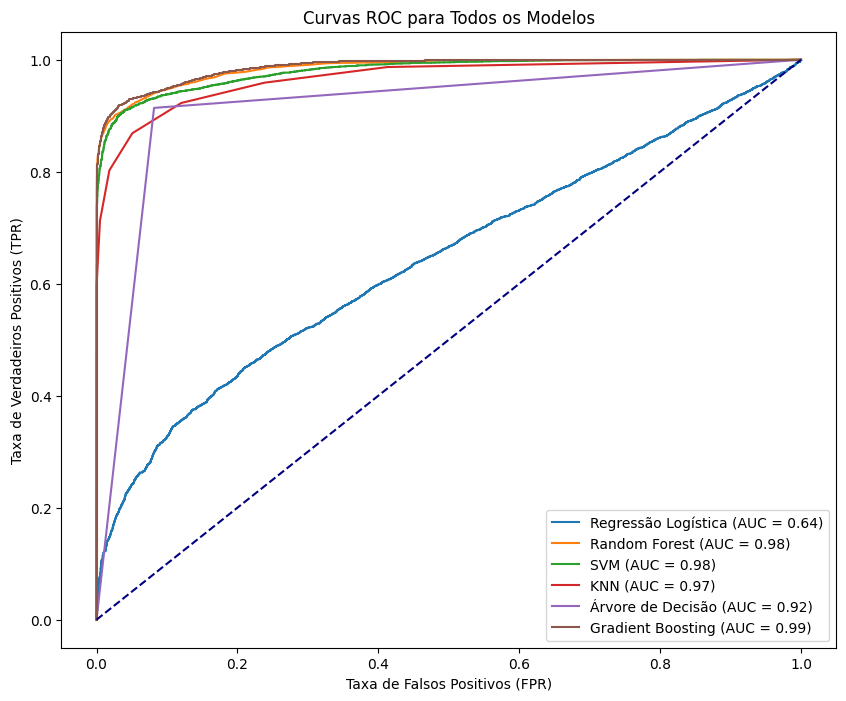

In [ ]:
# Figura para plotar todas as curvas ROC
plt.figure(figsize=(10, 8))
plt.title('Curvas ROC para Todos os Modelos')

for i, resultado in enumerate(resultados):
    modelo_nome = resultado['Modelo']
    pipeline = resultado['Pipeline']

    # Prever probabilidades
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    # Calcular a curva ROC e a AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plotar a curva ROC de cada modelo
    plt.plot(fpr, tpr, label=f'{modelo_nome} (AUC = {roc_auc:.2f})')

# Customizações finais para o gráfico ROC de todos os modelos
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Linha de referência
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc="lower right")
plt.show()

Ao analisar as curvas ROC dos modelos, observa-se que os modelos de Gradient Boosting, Random Forest, SVM e KNN apresentaram as melhores taxas de acerto.

### 4.4. Plotar a Matriz de Confusão

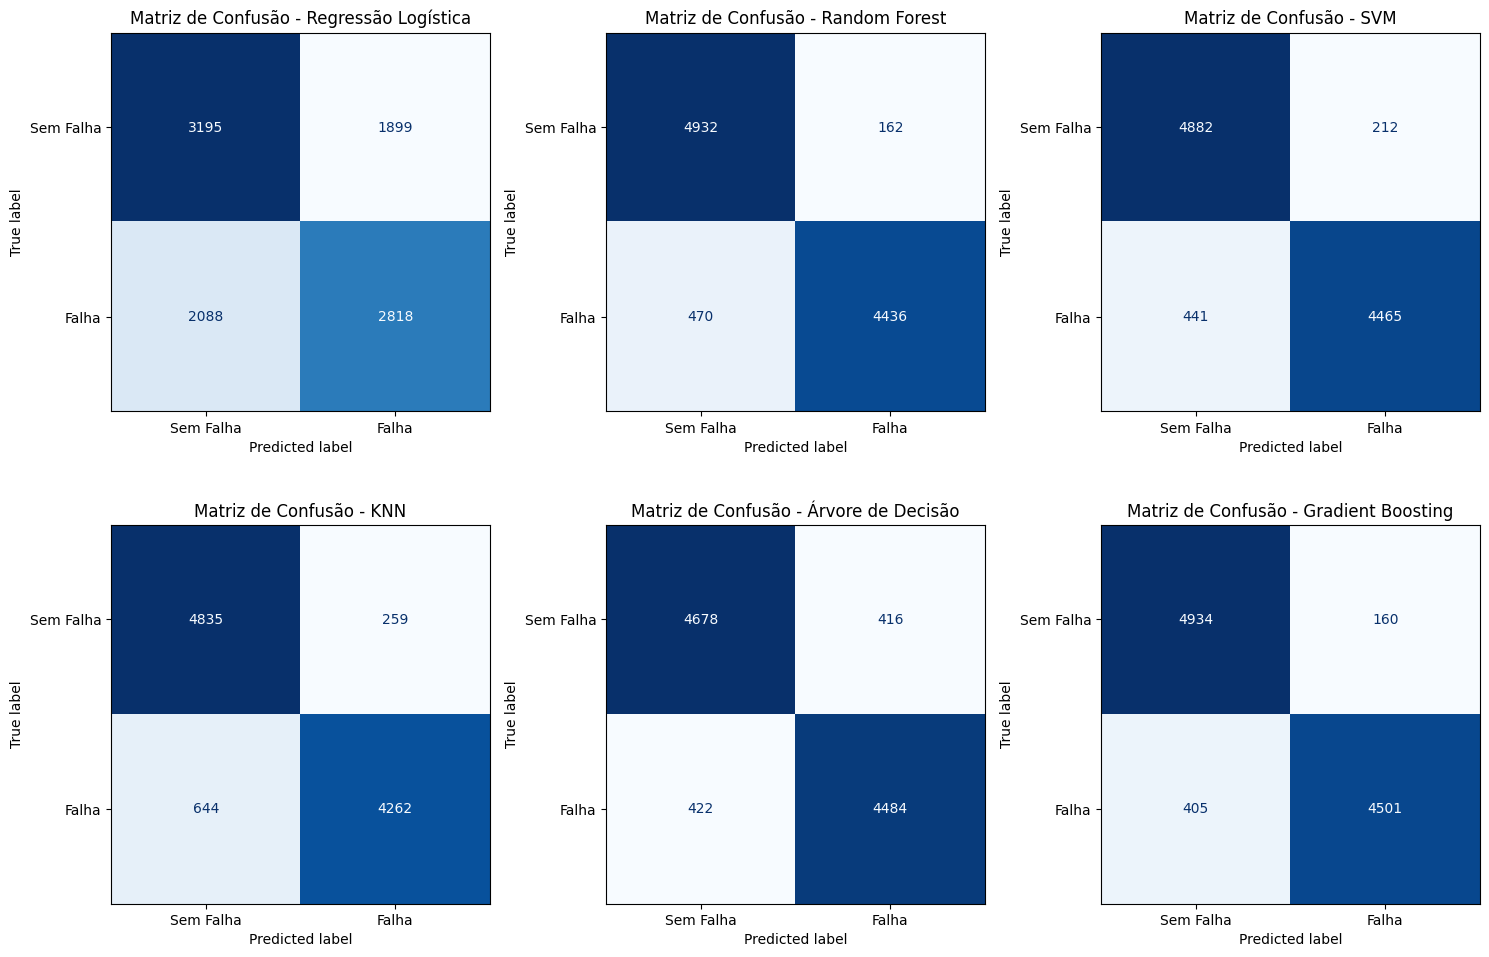

In [ ]:
# Número total de modelos
num_modelos = len(resultados)

# Definir a quantidade de colunas e linhas para os subplots
# 3 colunas e 2 linhas para 6 modelos
n_cols = 3
n_rows = 2

# Criar a figura e os eixos dos subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()  # Achatar a matriz de eixos para facilitar a iteração

# Iterar sobre cada modelo e plotar sua matriz de confusão
for i, resultado in enumerate(resultados):
    modelo_nome = resultado['Modelo']
    pipeline = resultado['Pipeline']

    # Previsão para o conjunto de teste
    y_pred = pipeline.predict(X_test)

    # Gerar a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Criar a visualização da matriz de confusão no subplot correspondente
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sem Falha', 'Falha'])
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)

    # Definir o título para cada subplot
    axes[i].set_title(f'Matriz de Confusão - {modelo_nome}', fontsize=12)

# Remover quaisquer subplots vazios (caso o número de modelos não preencha todos os subplots)
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()

Ao analisar as matrizes de confusão do modelo é possível perceber que os modelos que têm os menores números de falsos negativos e falsos positivos são os modelos de  Gradient Boosting, Random Forest e SVM. Esse resultado é esperado, uma vez que foram os modelos que obtiveram os melhores resultados no F1-Score.

### 4.5. Seleção do melhor modelo

O melhor modelo foi selecionado pela métrica F1, uma vez que queremos minimizar os falsos positivos e os falsos negativos.


In [ ]:
# Selecionar o melhor modelo com base no F1
indice_melhor_modelo = df_resultados['F1-Score'].idxmax()  # Encontra o índice do modelo com maior F1
melhor_modelo = df_resultados.loc[indice_melhor_modelo, 'Modelo']
melhor_pipeline = df_resultados.loc[indice_melhor_modelo, 'Pipeline']

# Salvar o modelo usando joblib
joblib.dump(melhor_pipeline, 'melhor_modelo.pkl')

print(f"O melhor modelo foi: {melhor_modelo}")
print(f"Com os hiperparâmetros: {df_resultados.loc[indice_melhor_modelo, 'Melhores Hiperparâmetros']}")
print(f"Acurácia: {df_resultados.loc[indice_melhor_modelo, 'Acurácia']}")

O melhor modelo foi: Gradient Boosting
Com os hiperparâmetros: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 7, 'classifier__n_estimators': 200}
Acurácia: 0.9435


In [ ]:
# Carregando o melhor modelo
modelo_carregado = joblib.load('melhor_modelo.pkl')

### 4.6. Checagem de overfitting e underfitting

Para avaliar se o modelo está com problemas de overfitting ou underfitting, serão comparadas as métricas de desempenho entre os conjuntos de treinamento e de teste.

Além disso, será plotada a curva de aprendizagem para melhor visualização dos desempenhos entre os dois conjuntos.

In [ ]:
# Avaliação no conjunto de treinamento
y_train_pred = melhor_pipeline.predict(X_train)
print("Relatório de Classificação - Treinamento")
print(classification_report(y_train, y_train_pred))

# Avaliação no conjunto de teste
y_test_pred = melhor_pipeline.predict(X_test)
print("Relatório de Classificação - Teste")
print(classification_report(y_test, y_test_pred))

Relatório de Classificação - Treinamento
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     20290
           1       1.00      0.96      0.98     19710

    accuracy                           0.98     40000
   macro avg       0.98      0.98      0.98     40000
weighted avg       0.98      0.98      0.98     40000

Relatório de Classificação - Teste
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5094
           1       0.97      0.92      0.94      4906

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



É possível observar que não há overfitting e nem underfitting, uma vez que não há uma discrepância entre o desempenho dos conjuntos de teste e de treinamento e ambos apresentam bons desempenhos.

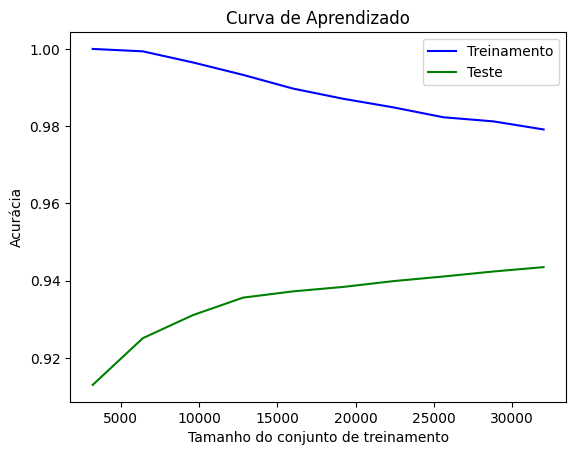

In [ ]:
# Função para plotar as curvas de aprendizado
def plot_learning_curve(model, X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, label="Treinamento", color="blue")
    plt.plot(train_sizes, test_mean, label="Teste", color="green")
    plt.ylabel('Acurácia')
    plt.xlabel('Tamanho do conjunto de treinamento')
    plt.title('Curva de Aprendizado')
    plt.legend()
    plt.show()

# Use a função com seu modelo
plot_learning_curve(melhor_pipeline, X_train, y_train)

Com a plotagem da curva de aprendizado, fica claro que não há overfitting ou underfitting, pois a curva de treinamento não está muito acima da curva de teste e ambas convergem para bons valores de acurácia.

### 4.7. Análise das variáveis mais influentes com Gradient Boosting

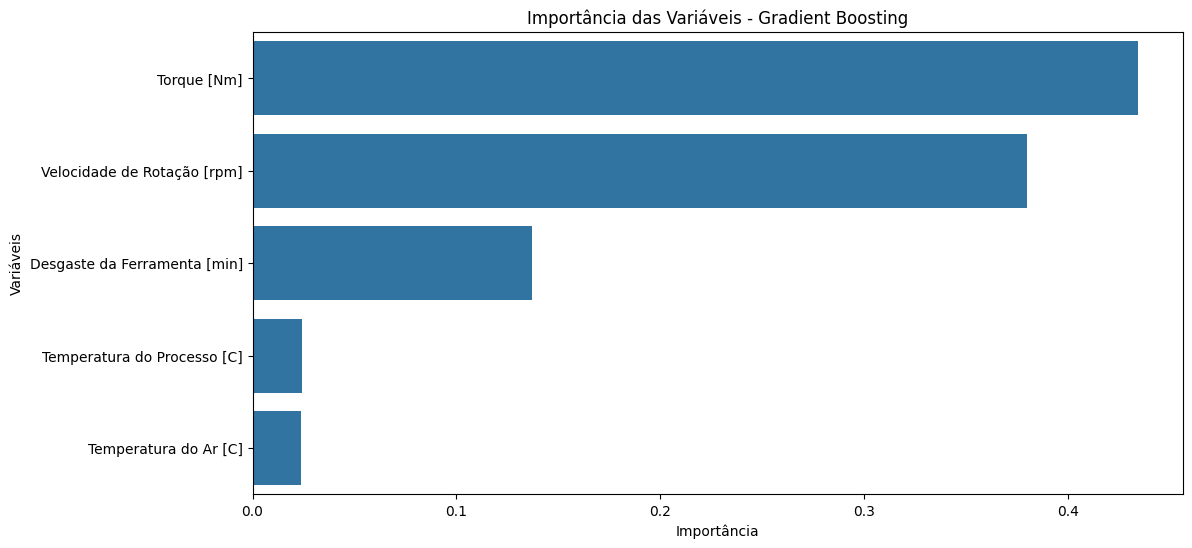

In [ ]:
# Obter o melhor modelo de Gradient Boosting
best_gb_model = [resultado for resultado in resultados if resultado['Modelo'] == 'Gradient Boosting'][0]['Pipeline']

# Ajustar o modelo para obter as importâncias das variáveis
best_gb_model.fit(X_train, y_train)

# Obter importâncias das variáveis
importances = best_gb_model.named_steps['classifier'].feature_importances_
feature_names = best_gb_model.named_steps['preprocessor'].transformers_[0][1].named_steps['scaler'].get_feature_names_out(numeric_features).tolist()

# Adicionando as variáveis categóricas
if categorical_features.size > 0:
    feature_names += best_gb_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features).tolist()

# Criar um DataFrame para visualizar as importâncias
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotar as importâncias das variáveis
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importância das Variáveis - Gradient Boosting')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.show()

### 4.8. Amostra de teste para o usuário

In [ ]:
def obter_dados_usuario():
    print("Insira os dados da máquina:")

    # Solicitar input do usuário
    temp_do_ar = float(input("Temperatura do Ar [C]: "))
    temp_do_processo = float(input("Temperatura do Processo [C]: "))
    velocidade_de_rotacao = float(input("Velocidade de Rotação [rpm]: "))
    torque = float(input("Torque [Nm]: "))
    desgaste_da_ferramenta = float(input("Desgaste da Ferramenta [min]: "))

    novo_dado = pd.DataFrame({
        'Temperatura do Ar [C]': [temp_do_ar] ,
        'Temperatura do Processo [C]': [temp_do_processo],
        'Velocidade de Rotação [rpm]': [velocidade_de_rotacao],
        'Torque [Nm]': [torque],
        'Desgaste da Ferramenta [min]': [desgaste_da_ferramenta],
    })

    return novo_dado

In [ ]:
while True:
    # Obter dados do usuário
    novo_dado = obter_dados_usuario()

    # Fazer a previsão
    predicao = modelo_carregado.predict(novo_dado)
    probabilidade = modelo_carregado.predict_proba(novo_dado)

    resultado = "Falha" if predicao[0] == 1 else "Sem Falha"
    prob_falha = probabilidade[0][1] * 100

    print(f"\nResultado da previsão: {resultado}")
    print(f"Probabilidade de falha: {prob_falha:.2f}%\n")

    # Perguntar se o usuário deseja inserir outro
    continuar = input("Deseja inserir outro dado? (s/n): ").lower()
    if continuar != 's':
        print("Encerrando as previsões.")
        break

Insira os dados da máquina:
Temperatura do Ar [C]: 20
Temperatura do Processo [C]: 30
Velocidade de Rotação [rpm]: 1500
Torque [Nm]: 50
Desgaste da Ferramenta [min]: 30

Resultado da previsão: Sem Falha
Probabilidade de falha: 4.96%

Deseja inserir outro dado? (s/n): n
Encerrando as previsões.


## 5. Conclusão

No contexto do meu projeto de predição de manutenção de máquinas, o Gradient Boosting se mostrou o modelo mais eficaz. Ele consegue capturar de forma precisa as relações não lineares e as interações complexas entre variáveis como temperatura e torque, aspectos que são bastante comuns em cenários industriais. O modelo se destacou por apresentar uma alta precisão e um bom equilíbrio entre precisão e recall, evidenciado por um F1-Score elevado. Além disso, o Gradient Boosting oferece uma certa robustez contra o overfitting, graças aos seus mecanismos de regularização. Outro ponto importante é que ele permite identificar as variáveis mais influentes nas falhas, o que facilita bastante a interpretação dos resultados e a tomada de decisões.

Ao comparar o Gradient Boosting com outros modelos, foi verificado que ele se destacou pela capacidade de ajustar erros de forma sequencial, o que acaba trazendo mais precisão em relação ao Random Forest, mesmo sendo ambos bastante robustos. Modelos como SVM e KNN não capturam tão bem as interações mais complexas das variáveis, especialmente com um dataset maior. Já modelos mais simples, como Regressão Logística, tendem a não captar toda a complexidade dos dados, e Árvores de Decisão isoladas são muito suscetíveis ao overfitting, diferente do que acontece com abordagens em ensemble como o Gradient Boosting.

Por último, para este programa foi utilizado o modo de execução TPU ao invés do padrão CPU, uma vez que o tempo de execução do modo CPU passa de 2 horas e o da TPU ficou abaixo de 20 minutos.